In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 170M/170M [00:01<00:00, 93.2MB/s]


In [ ]:
len(train_data)

50000

In [ ]:
image, label = train_data[0]

In [ ]:
image

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [ ]:
label

6

In [ ]:
classes = train_data.class_to_idx

In [ ]:
classes

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

In [ ]:
len(train_dataloader), len(test_dataloader)

(1563, 313)

In [ ]:
import torch.nn as nn

class CIFAR10_model(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*4*4,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    # print(x.shape)
    x =self.conv_block_2(x)
    # print(x.shape)
    x = self.conv_block_3(x)
    # print(x.shape)
    x = self.classifer(x)
    # print(x.shape)

    return x


In [ ]:
model_0 = CIFAR10_model(3, 16, 10)
model_0

CIFAR10_model(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [ ]:
!pip install torchinfo
import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3,32, 32])

Layer (type:depth-idx)                   Output Shape              Param #
CIFAR10_model                            [1, 10]                   --
├─Sequential: 1-1                        [1, 16, 16, 16]           --
│    └─Conv2d: 2-1                       [1, 16, 32, 32]           448
│    └─ReLU: 2-2                         [1, 16, 32, 32]           --
│    └─MaxPool2d: 2-3                    [1, 16, 16, 16]           --
├─Sequential: 1-2                        [1, 16, 8, 8]             --
│    └─Conv2d: 2-4                       [1, 16, 16, 16]           2,320
│    └─ReLU: 2-5                         [1, 16, 16, 16]           --
│    └─MaxPool2d: 2-6                    [1, 16, 8, 8]             --
├─Sequential: 1-3                        [1, 16, 4, 4]             --
│    └─Conv2d: 2-7                       [1, 16, 8, 8]             2,320
│    └─ReLU: 2-8                         [1, 16, 8, 8]             --
│    └─MaxPool2d: 2-9                    [1, 16, 4, 4]             --
├─Sequen

In [ ]:
image.shape

torch.Size([3, 32, 32])

In [ ]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
model = model_0.to(device)
epochs = 30

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model.train()
    train_loss = 0

    for batch, (images, labels) in enumerate(train_dataloader):
        images = images.to(device)
        labels = labels.long().to(device)

        y_pred = model(images)
        loss = loss_fn(y_pred, labels)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss = train_loss / len(train_dataloader)

    model.eval()
    test_loss = 0

    with torch.inference_mode():
        for test_images, test_labels in test_dataloader:
            test_images = test_images.to(device)
            test_labels = test_labels.long().to(device)

            test_pred = model(test_images)
            loss = loss_fn(test_pred, test_labels)
            test_loss += loss.item()

    test_loss = test_loss / len(test_dataloader)

    epoch_count.append(epoch)
    train_loss_values.append(train_loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}")

Epoch: 0 | Train loss: 2.3032 | Test loss: 2.3020
Epoch: 1 | Train loss: 2.3012 | Test loss: 2.3001
Epoch: 2 | Train loss: 2.2990 | Test loss: 2.2975
Epoch: 3 | Train loss: 2.2957 | Test loss: 2.2933
Epoch: 4 | Train loss: 2.2897 | Test loss: 2.2847
Epoch: 5 | Train loss: 2.2766 | Test loss: 2.2650
Epoch: 6 | Train loss: 2.2457 | Test loss: 2.2189
Epoch: 7 | Train loss: 2.1794 | Test loss: 2.1329
Epoch: 8 | Train loss: 2.0870 | Test loss: 2.0355
Epoch: 9 | Train loss: 2.0189 | Test loss: 1.9878
Epoch: 10 | Train loss: 1.9803 | Test loss: 1.9522
Epoch: 11 | Train loss: 1.9455 | Test loss: 1.9183
Epoch: 12 | Train loss: 1.9070 | Test loss: 1.8773
Epoch: 13 | Train loss: 1.8635 | Test loss: 1.8303
Epoch: 14 | Train loss: 1.8173 | Test loss: 1.7880
Epoch: 15 | Train loss: 1.7740 | Test loss: 1.7477
Epoch: 16 | Train loss: 1.7344 | Test loss: 1.7106
Epoch: 17 | Train loss: 1.6998 | Test loss: 1.6789
Epoch: 18 | Train loss: 1.6712 | Test loss: 1.6544
Epoch: 19 | Train loss: 1.6474 | Test los

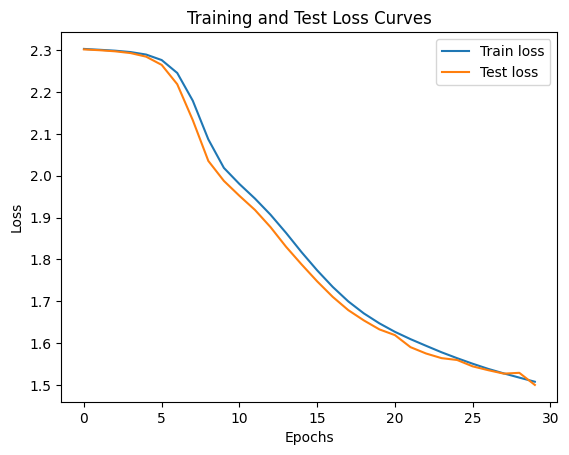

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train_loss_np = torch.tensor(train_loss_values).cpu().numpy()
test_loss_np = torch.tensor(test_loss_values).cpu().numpy()

plt.plot(epoch_count, train_loss_np, label="Train loss")
plt.plot(epoch_count, test_loss_np, label="Test loss")
plt.title("Training and Test Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok = True)

MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/model_0.pth


In [ ]:
loaded_model = CIFAR10_model(input_shape=3, hidden_units=16, output_shape=10)

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model = loaded_model.to(device)

In [ ]:
from torchvision import transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(32, 32)),
    transforms.ToTensor()
])

In [ ]:

from PIL import Image

img = Image.open("/content/test2.png")

if img.mode == "RGBA":
  img = img.convert("RGB")

In [ ]:
new_img_tensor = data_transform(img).unsqueeze(0).to(device)

In [ ]:
new_img_tensor.shape

torch.Size([1, 3, 32, 32])

In [ ]:
with torch.inference_mode():
  output = loaded_model(new_img_tensor)
  pred = torch.argmax(output, dim=1).item()

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

print(f"predicted class: {pred} -> {class_names[pred]}")


predicted class: 0 -> airplane
